# Task - 05


## Engineer new features and select relevant features for model training.

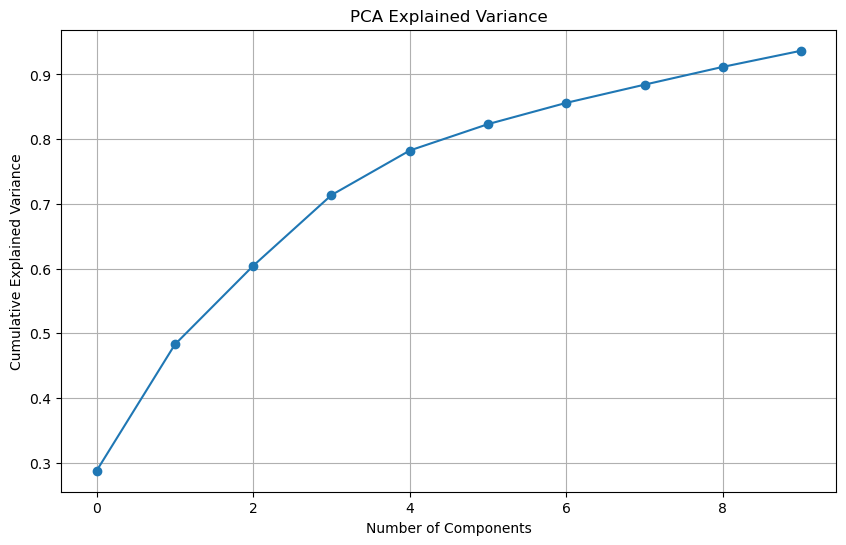

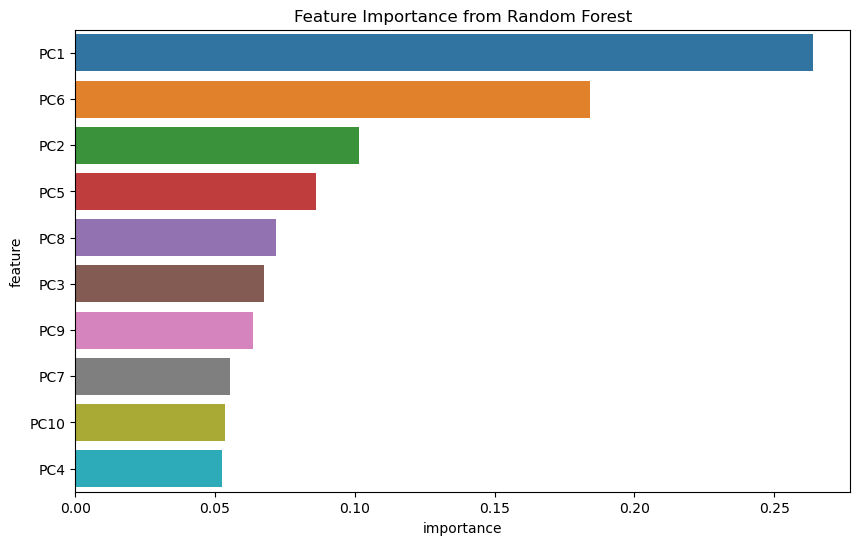

Model accuracy with selected features: 1.0000
Selected top features based on importance:
['PC1', 'PC6', 'PC2', 'PC5', 'PC8', 'PC3', 'PC9', 'PC7', 'PC10', 'PC4']


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("C:\\users\\banda\\downloads\\heart.csv")

# Generate new features
# Example: Polynomial features and interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
poly_features = pd.DataFrame(poly_features, columns=poly.get_feature_names(['age', 'trestbps', 'chol', 'thalach', 'oldpeak']))

# Combine with original data
data = pd.concat([data, poly_features], axis=1)

# Visualize correlation matrix heatmap
# plt.figure(figsize=(14, 12))
# correlation_matrix = data.corr()
# sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
# plt.title("Correlation Matrix Heatmap")
# plt.show()

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['target']))

# Apply PCA
pca = PCA(n_components=10)  # You can adjust the number of components
pca_features = pca.fit_transform(scaled_data)

# Visualize PCA explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# Create a DataFrame with PCA features
pca_features_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])

# Add the target column
pca_features_df['target'] = data['target']

# Split the data into training and testing sets
X = pca_features_df.drop(columns=['target'])
y = pca_features_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier to determine feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

# Select top features based on importance
top_features = feature_importance_df['feature'][:10].tolist()
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Retrain the model with the selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate the model
y_pred = rf_selected.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy with selected features: {accuracy:.4f}")

# Display the selected features
print("Selected top features based on importance:")
print(top_features)
